In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\bkhan\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

In [233]:
df = pd.read_csv("Employees Promotion.csv")    # loading employee promotion.csv data from day09-project s3 bucket.
df.head()

,EmployeeID,Department,Region_Employment,Education Level,Gender,Recruitment Channel,NO_Trainings_LstYear,Age,previous_year_rating,Service Length,Awards,Avg_Training_Score,Is Promoted
0,65438,Sales & Marketing,7,Master's & above,f,sourcing,1,35.0,5.0,8,NO,49.0,NO
1,65141,Operations,22,Bachelor's,m,other,1,30.0,5.0,4,NO,60.0,NO
2,7513,Sales & Marketing,19,Bachelor's,m,sourcing,1,34.0,3.0,7,NO,50.0,NO
3,2542,Sales & Marketing,23,Bachelor's,m,other,2,39.0,1.0,10,NO,50.0,NO
4,48945,Technology,26,Bachelor's,m,other,1,45.0,3.0,2,NO,73.0,NO


### Analysing Data

In [234]:
df.info()   # checking data types, dimensions of df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EmployeeID            54808 non-null  int64  
 1   Department            54808 non-null  object 
 2   Region_Employment     54808 non-null  int64  
 3   Education Level       52399 non-null  object 
 4   Gender                54808 non-null  object 
 5   Recruitment Channel   44404 non-null  object 
 6   NO_Trainings_LstYear  54808 non-null  int64  
 7   Age                   54268 non-null  float64
 8   previous_year_rating  50684 non-null  float64
 9   Service Length        54808 non-null  int64  
 10  Awards                54808 non-null  object 
 11  Avg_Training_Score    52248 non-null  float64
 12  Is Promoted           54808 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 5.4+ MB


In [235]:
df.describe()    # stats of the df

,EmployeeID,Region_Employment,NO_Trainings_LstYear,Age,previous_year_rating,Service Length,Avg_Training_Score
count,54808.000000,54808.000000,54808.000000,54268.000000,50684.000000,54808.000000,52248.000000
mean,39195.830627,14.195045,1.253011,34.586644,3.329256,5.865512,63.712238
std,22586.581449,10.086273,0.609264,8.114136,1.259993,4.265094,13.521910
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,39.000000
25%,19669.750000,4.000000,1.000000,29.000000,3.000000,3.000000,51.000000
50%,39225.500000,13.000000,1.000000,33.000000,3.000000,5.000000,60.000000
75%,58730.500000,22.000000,1.000000,39.000000,4.000000,7.000000,77.000000
max,78298.000000,34.000000,10.000000,60.000000,5.000000,37.000000,99.000000


In [236]:
df.shape    # dimesnsions of the df

(54808, 13)

In [237]:
df.duplicated().sum()    # checking any duplicated values in the df

0

In [238]:
df.isnull().sum()    # checking total null values in each column

EmployeeID                  0
Department                  0
Region_Employment           0
Education Level          2409
Gender                      0
Recruitment Channel     10404
NO_Trainings_LstYear        0
Age                       540
previous_year_rating     4124
Service Length              0
Awards                      0
Avg_Training_Score       2560
Is Promoted                 0
dtype: int64

In [239]:
df['Is Promoted'].value_counts()    # target column value counts

NO     50140
YES     4668
Name: Is Promoted, dtype: int64

### Cleaning and Engineering data

In [240]:
df['Is Promoted'] = df['Is Promoted'].map({'YES': 1, 'NO': 0})    # mapping the target column values i.e. Yes and No to 1 and 0.

In [241]:
df['Education Level'].unique()    # unique values of Education Level column

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [242]:
df['Education Level'].value_counts()    # Value counts of each values in the Education Level column.

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: Education Level, dtype: int64

In [243]:
df['Education Level'].isnull().sum()    # total null values in Education Level column

2409

In [244]:
df['Education Level'].fillna(method='ffill', inplace=True)    # using forward fill to fill null values

In [245]:
df['Education Level'].value_counts()    # now checking the count

Bachelor's          38390
Master's & above    15579
Below Secondary       839
Name: Education Level, dtype: int64

In [246]:
df['Education Level'].isnull().sum()    # checking null values

0

In [247]:
df.Age.unique()    # unique values of age column

array([35., 30., 34., 39., 45., 31., 33., 28., 32., 49., 37., 38., 41.,
       27., 29., 26., 24., 57., 40., 42., 23., 59., nan, 50., 56., 20.,
       25., 47., 36., 46., 44., 60.,  0., 43., 22., 54., 58., 48., 53.,
       55., 51., 52., 21.])

In [248]:
df.Age.value_counts()    # value counts of age column

30.0    3597
32.0    3479
31.0    3474
29.0    3352
33.0    3157
28.0    3103
34.0    3017
27.0    2784
35.0    2673
36.0    2482
37.0    2134
26.0    2019
38.0    1894
39.0    1660
40.0    1634
25.0    1283
41.0    1265
42.0    1133
43.0     978
44.0     834
24.0     832
45.0     749
46.0     686
48.0     554
47.0     550
50.0     516
49.0     435
23.0     419
51.0     386
53.0     354
52.0     345
0.0      340
54.0     306
55.0     285
56.0     262
57.0     234
22.0     228
60.0     214
58.0     211
59.0     202
20.0     110
21.0      98
Name: Age, dtype: int64

In [249]:
df.Age.fillna(df['Age'].median(), inplace=True)    # filling the null values of age column using median of age column

In [250]:
df.previous_year_rating.unique()    # unique values of previous_year_rating column

array([ 5.,  3.,  1.,  4., nan,  2.])

In [251]:
df.previous_year_rating.value_counts()    # value counts of previous_year_rating col

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [252]:
df.previous_year_rating.fillna(df.previous_year_rating.median(), inplace=True)    # filling previous_year_rating col using its median

In [253]:
df.Avg_Training_Score.unique()   # unique values of Avg_Training_Score col

array([49., 60., 50., 73., 85., 59., 63., 83., 54., 77., 80., 84., 51.,
       46., 75., 57., 70., 68., 79., 44., 72., nan, 48., 58., 87., 47.,
       52., 88., 71., 65., 62., 53., 78., 91., 82., 69., 55., 74., 86.,
       90., 92., 67., 89., 56., 76., 81., 64., 39., 94., 93., 66., 95.,
       42., 96., 40., 99., 43., 97., 41., 98.])

In [254]:
df.Avg_Training_Score.value_counts()   # value counts of Avg_Training_Score col

50.0    2716
49.0    2681
48.0    2437
51.0    2347
60.0    2155
59.0    2064
58.0    1898
52.0    1856
47.0    1746
62.0    1450
82.0    1447
57.0    1437
81.0    1357
53.0    1324
80.0    1206
83.0    1198
84.0    1168
79.0    1160
46.0    1136
85.0    1072
56.0    1070
70.0    1055
63.0    1021
69.0    1018
54.0     997
68.0     935
78.0     933
86.0     912
71.0     898
55.0     872
67.0     728
72.0     725
64.0     708
77.0     697
87.0     655
65.0     599
66.0     580
73.0     523
76.0     516
88.0     444
74.0     433
75.0     403
44.0     335
89.0     301
90.0     185
43.0     176
91.0     117
92.0      99
93.0      84
94.0      65
42.0      62
97.0      49
96.0      48
95.0      45
98.0      37
99.0      35
41.0      26
40.0       5
39.0       2
Name: Avg_Training_Score, dtype: int64

In [255]:
df.Avg_Training_Score.fillna(df.Avg_Training_Score.median(), inplace=True)    # filling null values using Avg_Training_Score median values

In [256]:
df = df.drop(['EmployeeID', 'Gender', 'Service Length', 'Recruitment Channel'], axis=1)    # dropping these four columns

In [257]:
df.head()

,Department,Region_Employment,Education Level,NO_Trainings_LstYear,Age,previous_year_rating,Awards,Avg_Training_Score,Is Promoted
0,Sales & Marketing,7,Master's & above,1,35.0,5.0,NO,49.0,0
1,Operations,22,Bachelor's,1,30.0,5.0,NO,60.0,0
2,Sales & Marketing,19,Bachelor's,1,34.0,3.0,NO,50.0,0
3,Sales & Marketing,23,Bachelor's,2,39.0,1.0,NO,50.0,0
4,Technology,26,Bachelor's,1,45.0,3.0,NO,73.0,0


In [258]:
df.duplicated().sum()    # checking total duolicate values

6194

In [259]:
df.drop_duplicates(keep='first', inplace=True)    # dropping duplicates whuile keeping its first value

In [260]:
df.duplicated().sum()

0

In [261]:
df['Is Promoted'].value_counts()

0    44007
1     4607
Name: Is Promoted, dtype: int64

In [288]:
# resampling class imbalance
from sklearn.utils import resample
#creating two different dataframe of majority and minority class 
df_majority = df[(df['Is Promoted']==0)] 
df_minority = df[(df['Is Promoted']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= 24000, # to match majority class
                                 random_state=42)  
# Combine majority class with upsampled minority class
df2 = pd.concat([df_minority_upsampled, df_majority])

<AxesSubplot:xlabel='Is Promoted', ylabel='count'>

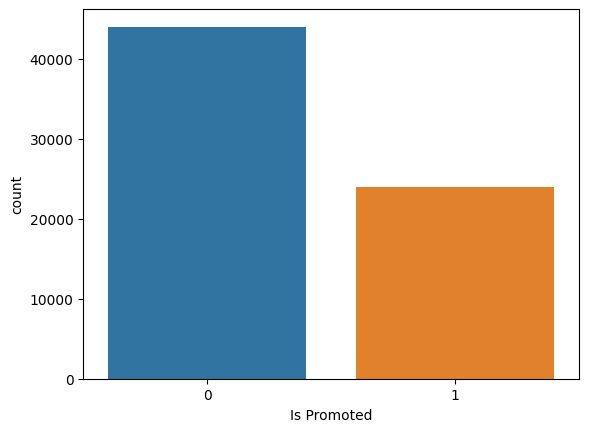

In [264]:
sns.countplot(x=df2['Is Promoted'], data=df2)    # countplot of target variable

In [265]:
df = pd.get_dummies(df2, columns=['Department', 'Education Level', 'Awards'])    # getting dummies data of these columns


In [266]:
df.head()

,Region_Employment,NO_Trainings_LstYear,Age,previous_year_rating,Avg_Training_Score,Is Promoted,Department_-,Department_Analytics,Department_Finance,Department_HR,...,Department_Operations,Department_Procurement,Department_R&D,Department_Sales & Marketing,Department_Technology,Education Level_Bachelor's,Education Level_Below Secondary,Education Level_Master's & above,Awards_NO,Awards_YES
9629,13,1,36.0,3.0,79.0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
44881,4,1,31.0,5.0,85.0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
37009,4,1,32.0,3.0,54.0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
5101,4,1,34.0,5.0,58.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
52772,23,1,42.0,5.0,56.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [267]:
df.isnull().sum()

Region_Employment                   0
NO_Trainings_LstYear                0
Age                                 0
previous_year_rating                0
Avg_Training_Score                  0
Is Promoted                         0
Department_-                        0
Department_Analytics                0
Department_Finance                  0
Department_HR                       0
Department_Legal                    0
Department_Operations               0
Department_Procurement              0
Department_R&D                      0
Department_Sales & Marketing        0
Department_Technology               0
Education Level_Bachelor's          0
Education Level_Below Secondary     0
Education Level_Master's & above    0
Awards_NO                           0
Awards_YES                          0
dtype: int64

In [268]:
indp_x = df.drop('Is Promoted', axis=1)
dep_y = df['Is Promoted']

In [269]:
x_train, x_test, y_train, y_test = train_test_split(indp_x, dep_y, test_size=0.2, random_state=42)      # splitting tarin and test in 80:20 ratio

Confusion Matrix:
 [8196  694 2410 2302]


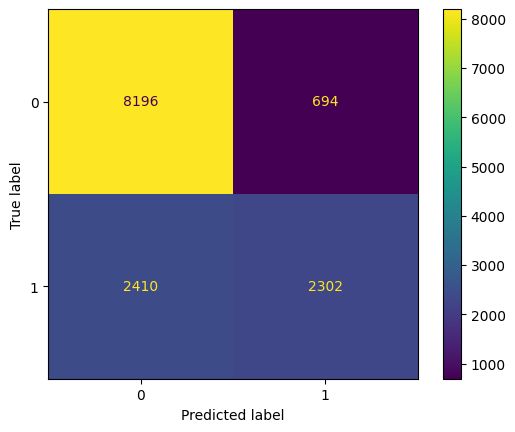

In [270]:
log_reg = make_pipeline(StandardScaler(), LogisticRegression())     #
log_reg.fit(x_train, y_train)

y_predict = log_reg.predict(x_test)
confusion_mat = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:\n', confusion_mat.ravel())
cm = ConfusionMatrixDisplay(confusion_mat)
cm.plot()

Accuracy: 0.7718
Precision: 0.7684
Recall: 0.4885
F1 Score: 0.5973
ROC AUC: 0.7052


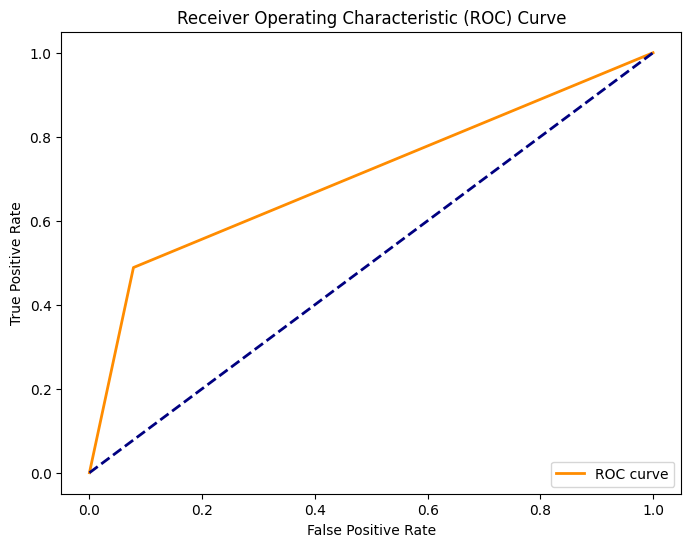

Confusion Matrix:
[[8196  694]
 [2410 2302]]


In [280]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt


# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy:.4f}')

# Calculate and print precision, recall, and F1 score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Calculate and print ROC AUC
roc_auc = roc_auc_score(y_test, y_predict)
print(f'ROC AUC: {roc_auc:.4f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:')
print(conf_matrix)


In [272]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      8890
           1       0.77      0.49      0.60      4712

    accuracy                           0.77     13602
   macro avg       0.77      0.71      0.72     13602
weighted avg       0.77      0.77      0.76     13602



### XGBoost

In [277]:
import xgboost as xgb

# Creating a DMatrix for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# XGBoost parameters
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 10,  # Number of classes
    'max_depth': 6,  # Maximum depth of trees
    'eta': 0.3,  # Learning rate
}

num_round = 100  # Number of boosting rounds

# Training the XGBoost model
xgmodel = xgb.train(params, dtrain, num_round)
y_pred = xgmodel.predict(dtest)

# Evaluating the model's performance
xg_accuracy = accuracy_score(y_test, y_pred)
xg_precision = precision_score(y_test, y_pred)
xg_recall = recall_score(y_test, y_pred)
xg_f1 = f1_score(y_test, y_pred)

print("Validation Accuracy:", xg_accuracy)
print("Validation Precision:", xg_precision)
print("Validation Recall:", xg_recall)
print("Validation F1-Score:", xg_f1)

Validation Accuracy: 0.8234818409057492
Validation Precision: 0.8319448434357943
Validation Recall: 0.6146010186757216
Validation F1-Score: 0.7069449530086659


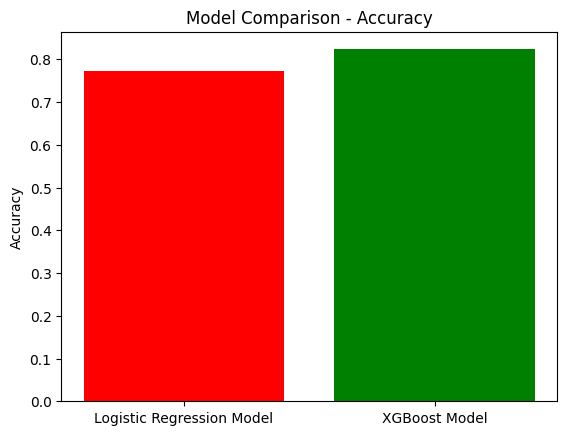

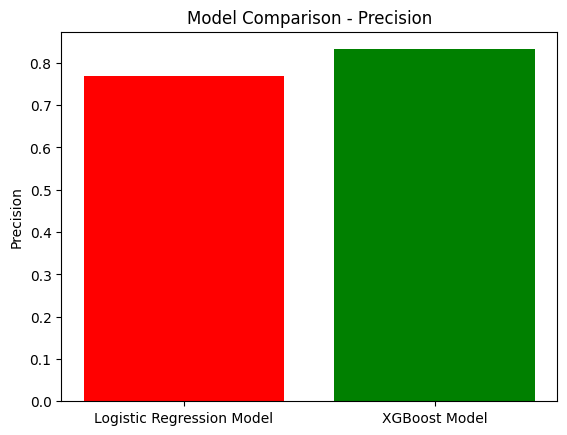

In [287]:
# comparing Accuracies of both models.
labels = ['Logistic Regression Model', 'XGBoost Model']
accuracy_scores = [accuracy, xg_accuracy]

# Add other metrics to the lists if needed
precision_scores = [precision, xg_precision]
recall_scores = [recall, xg_recall]
f1_scores = [f1, xg_f1]

# Bar plot for accuracy
plt.bar(labels, accuracy_scores, color=['red', 'green'])
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.show()

# precision
plt.bar(labels, precision_scores, color=['red', 'green'])
plt.title('Model Comparison - Precision')
plt.ylabel('Precision')
plt.show()